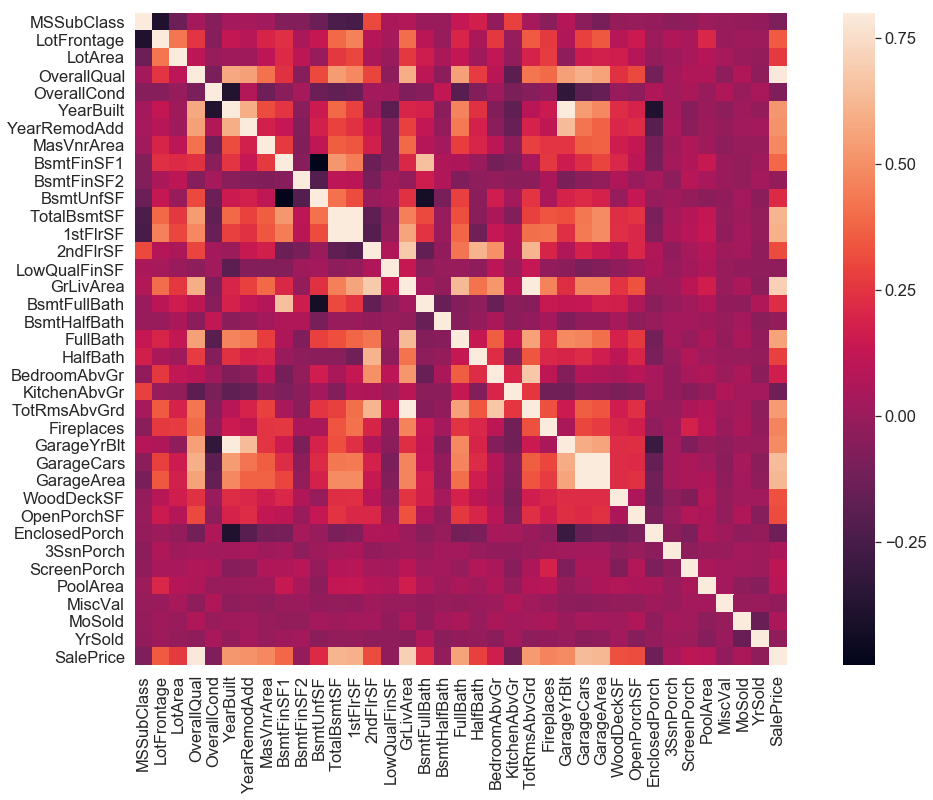

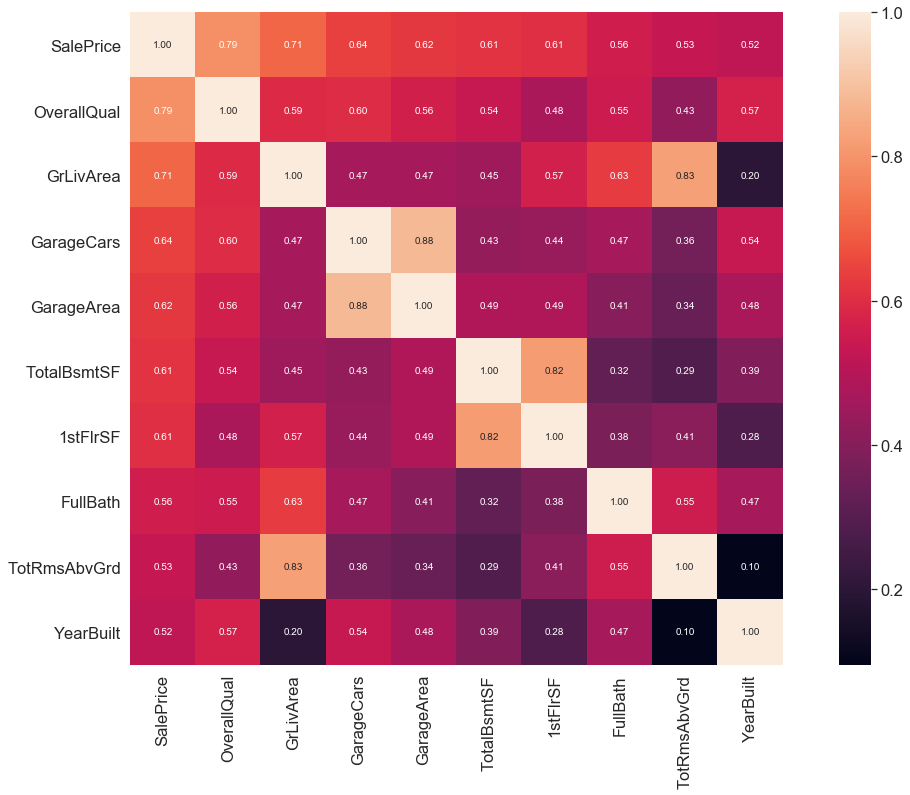

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


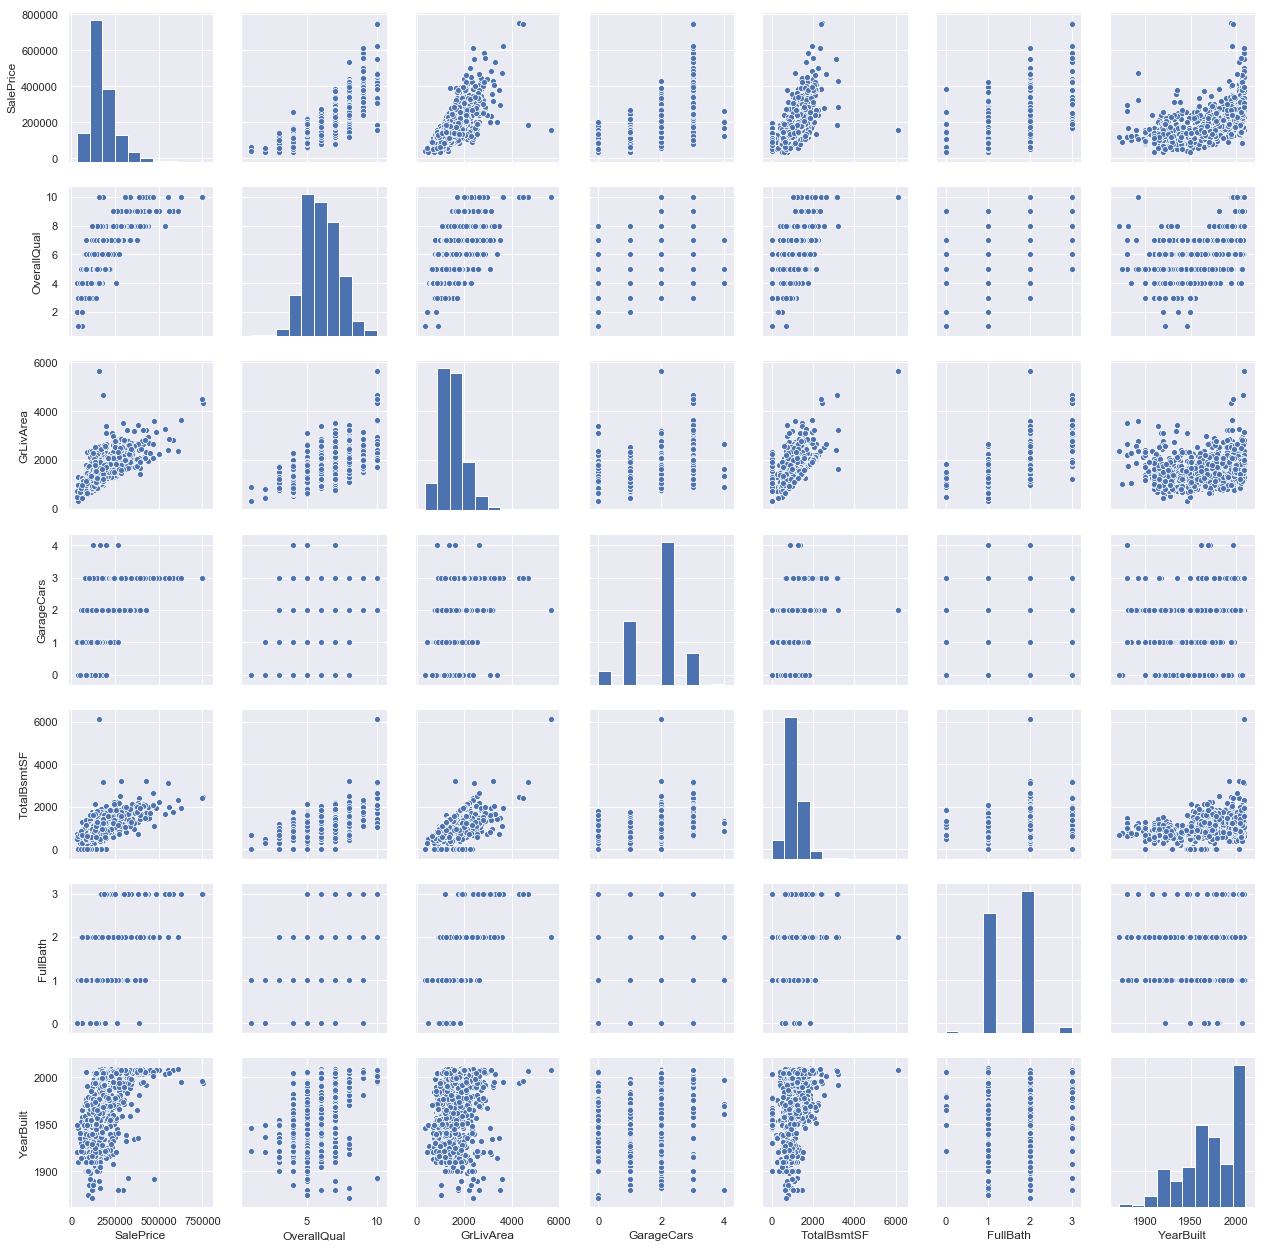

In [6]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 数据预处理
train = pd.read_csv("../data/house/train.csv")
test = pd.read_csv("../data/house/test.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width',4000)

# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train_corr = train.drop('Id',axis=1).corr()
# train_corr

# 所有特征相关度分析
# 画出相关性热力图
a = plt.subplots(figsize=(20, 12))#调整画布大小
a = sns.heatmap(train_corr, vmax=.8, square=True)#画热力图   annot=True 显示系数

# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();


In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 数据预处理
train = pd.read_csv("../data/house/train.csv")
test = pd.read_csv("../data/house/test.csv")
# train[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()

test['SalePrice'] = None
train_test = pd.concat((train, test)).reset_index(drop=True)
'''
1. 对于缺失率过高的特征，例如 超过15% 我们应该删掉相关变量且假设该变量并不存在
2. GarageX 变量群的缺失数据量和概率都相同，可以选择一个就行，例如：GarageCars
3. 对于缺失数据在5%左右（缺失率低），可以直接删除/回归预测
'''
total= train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Lost Percent'])

# print(missing_data[missing_data.isnull().values==False].sort_values('Total', axis=0, ascending=False).head(20))

train_test = train_test.drop((missing_data[missing_data['Total'] > 1]).index.drop('SalePrice') , axis=1)
# train_test = train_test.drop(train.loc[train['Electrical'].isnull()].index)

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp.isnull().sum().max()) # justchecking that there's no missing data missing


1
